In [1]:
# Import pandas
import pandas as pd

# Define file containing dataset
runkeeper_file = './datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=['Date'], index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
df_activities.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2015-05-19 18:48:36,21c55ade-208e-4525-893f-07b152dd7799,Running,NaN,12.73,1:02:30,4:55,12.22,859.0,109,134.0,NaN,NaN,2015-05-19-184836.gpx
2015-07-24 18:49:43,0998a635-1166-4d12-b143-56a922e05fd2,Running,NaN,12.69,1:05:15,5:09,11.67,858.0,108,146.0,NaN,NaN,2015-07-24-184943.gpx
2017-10-10 18:24:47,a734675d-6dca-437e-8bbe-0aaec901a5f2,Running,NaN,8.04,43:22,5:24,11.13,570.0,126,146.0,NaN,TomTom MySports Watch,2017-10-10-182447.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [2]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
# ... YOUR CODE FOR TASK 2 ...
df_activities.drop(cols_to_drop, axis=1, inplace=True)
# Count types of training activities
display(df_activities.Type.value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling', regex=False)

# Count missing values for each column
# ... YOUR CODE FOR TASK 2 ...
df_activities.isnull().sum(axis=0)

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

In [3]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
# ... YOUR CODE FOR TASK 3 ...
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
# Count missing values for each column in running data
# ... YOUR CODE FOR TASK 3 ...
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

C:\Users\Asus 24GB\AppData\Local\Temp\ipykernel_1836\3440371064.py:14: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2013_2018=df_run['2018':'2013']


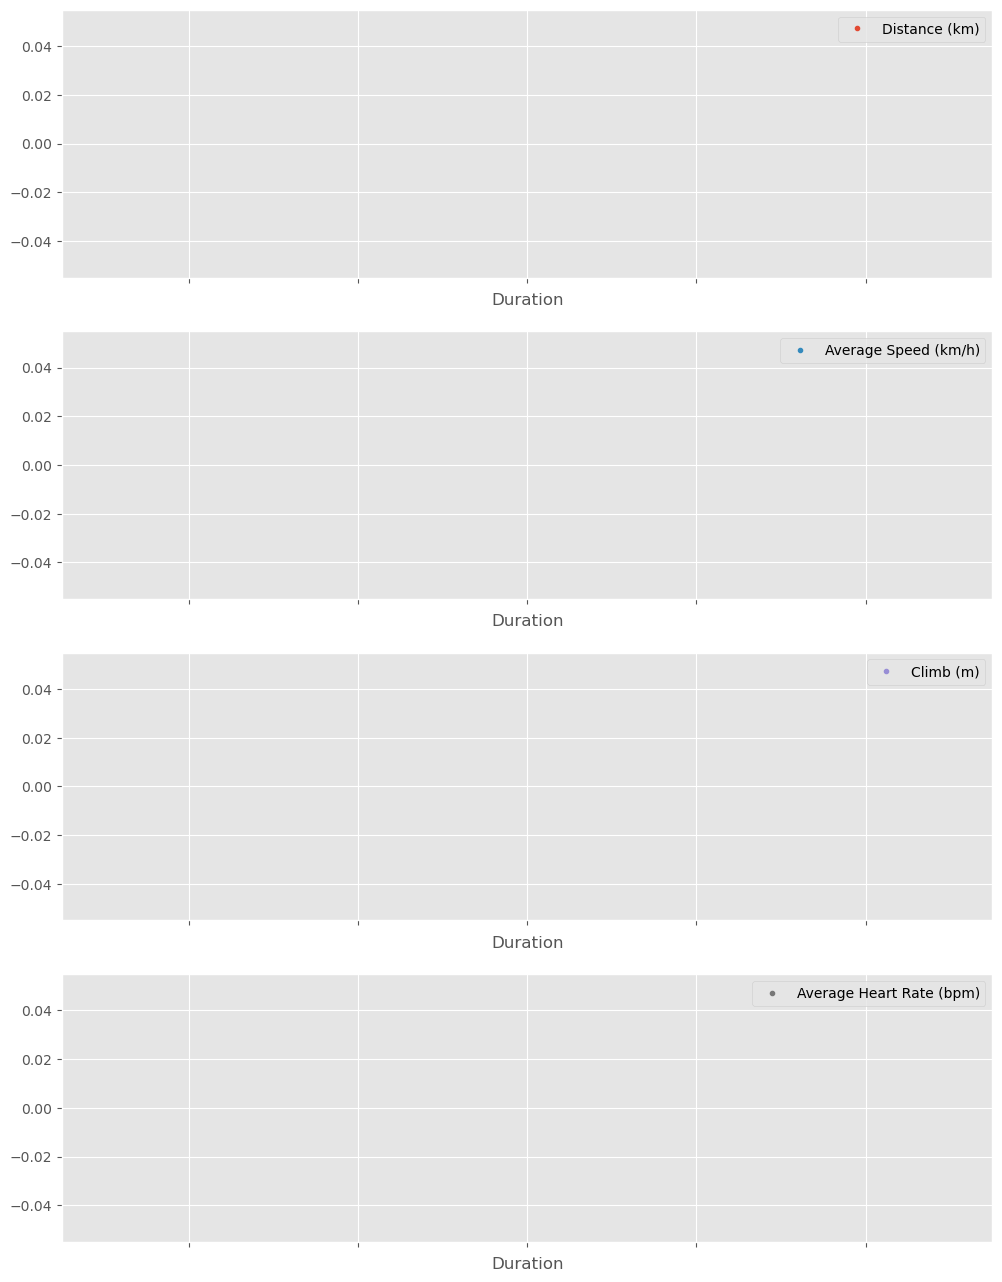

In [12]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018=df_run['2018':'2013']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,sharex=False,figsize=(12,16),linestyle='none',marker='o',markersize=3,)

# Show plot
# ... YOUR CODE FOR TASK 4 ...
plt.show()